# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [9]:
print(cities)

['alofi', 'ushuaia', 'souillac', 'duluth', 'mataura', 'dikson', 'belushya guba', 'port hedland', 'punta arenas', 'waipawa', 'hilo', 'los llanos de aridane', 'atuona', 'umm kaddadah', 'guerrero negro', 'tumannyy', 'mangan', 'ixtapa', 'kracheh', 'krasnoselkup', 'rikitea', 'comodoro rivadavia', 'ulladulla', 'balancan', 'victoria', 'kholodnyy', 'taltal', 'gongzhuling', 'saldanha', 'saint-philippe', 'berlevag', 'geraldton', 'vaini', 'muisne', 'hithadhoo', 'semme', 'pangnirtung', 'amderma', 'narsaq', 'sioux lookout', 'ardistan', 'albany', 'westport', 'cabo san lucas', 'aransas pass', 'sliven', 'namatanai', 'sembe', 'busselton', 'mahebourg', 'san quintin', 'carnarvon', 'makakilo city', 'castro', 'maymyo', 'ayan', 'bambous virieux', 'hermanus', 'nguiu', 'cape town', 'provideniya', 'sorland', 'tarudant', 'hojai', 'thompson', 'nabire', 'abu samrah', 'ribeira grande', 'torbay', 'vaitape', 'yar-sale', 'port alfred', 'faanui', 'kumluca', 'linchuan', 'chuy', 'nikolskoye', 'caravelas', 'tiznit', 'hob

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [6]:
from api_keys import api_keys

In [11]:
#Class example

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys
city = 'st. louis'

#q represents the city
req = requests.get(base_url + f'&q={city}')

#create a json output of the data
json_data = req.json()
print(json_data)

{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.11, 'feels_like': 58.15, 'temp_min': 53.44, 'temp_max': 63.41, 'pressure': 1020, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1634609754, 'sys': {'type': 2, 'id': 2009674, 'country': 'US', 'sunrise': 1634559181, 'sunset': 1634599104}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


In [10]:
city_weather = {'city':[],
               'lng':[],
                'lat':[],
               'country':[],
               'max_temp':[],
               'pressure':[],
               'humidity':[],
               'wind_speed':[],
               'cloudiness':[],
               'date':[]}

#Loop through cities
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys
    
    try:
        req = requests.get(base_url + f'&q={city}')
        data = req.json()
        
        city_weather['city'].append(data['name'])
        city_weather['lng'].append(data['coord']['lon'])
        city_weather['lat'].append(data['coord']['lat'])
        city_weather['country'].append(data['sys']['country'])
        city_weather['max_temp'].append(data['main']['temp_max'])
        city_weather['pressure'].append(data['main']['pressure'])
        city_weather['humidity'].append(data['main']['humidity'])
        city_weather['wind_speed'].append(data['wind']['speed'])
        city_weather['cloudiness'].append(data['clouds']['all'])
        city_weather['date'].append(data['dt'])
        
        print("Processing " + city)  
    except:
        print(city+ " not found")
        pass

Processing alofi
Processing ushuaia
Processing souillac
Processing duluth
Processing mataura
Processing dikson
belushya guba not found
Processing port hedland
Processing punta arenas
Processing waipawa
Processing hilo
Processing los llanos de aridane
Processing atuona
Processing umm kaddadah
Processing guerrero negro
tumannyy not found
Processing mangan
Processing ixtapa
kracheh not found
Processing krasnoselkup
Processing rikitea
Processing comodoro rivadavia
Processing ulladulla
Processing balancan
Processing victoria
Processing kholodnyy
Processing taltal
Processing gongzhuling
Processing saldanha
Processing saint-philippe
Processing berlevag
Processing geraldton
Processing vaini
Processing muisne
Processing hithadhoo
Processing semme
Processing pangnirtung
amderma not found
Processing narsaq
Processing sioux lookout
ardistan not found
Processing albany
Processing westport
Processing cabo san lucas
Processing aransas pass
Processing sliven
Processing namatanai
Processing sembe
Proce

In [40]:
city_weather

{'city': ['New Norfolk',
  'Iqaluit',
  'Hobart',
  'Yatou',
  'Nouadhibou',
  'Kishorganj',
  'Hermanus',
  'Sokoni',
  'Upernavik',
  'Rikitea',
  'Yulara',
  'Busselton',
  'Hilo',
  'Hamilton',
  'Salalah',
  'Uíge',
  'Provideniya',
  'Aktobe',
  'Chokurdakh',
  'Kargasok',
  'Bandarbeyla',
  'Thompson',
  'Agüimes',
  'Richards Bay',
  'Tasiilaq',
  'Punta Arenas',
  'George Town',
  'Tuktoyaktuk',
  'Haines Junction',
  'Jamestown',
  'Kiyevskoye',
  'Yeppoon',
  'Carnarvon',
  "Severo-Kuril'sk",
  'Ushuaia',
  'Coos Bay',
  'Pangnirtung',
  'Albany',
  'Igarka',
  'Norman Wells',
  'Atuona',
  'Qaqortoq',
  'Sisimiut',
  'Noumea',
  'Mataura',
  'Kapaa',
  'Kloulklubed',
  'Dikson',
  'Vaini',
  'Chui',
  'Beloha',
  'Mahébourg',
  'Xining',
  'Coquimbo',
  'Arraial do Cabo',
  'Montrose',
  'Sagamu',
  'Polunochnoye',
  'Vacaria',
  'Ancud',
  'Hondomachi-hondo',
  'Dongsheng',
  'Umluj',
  'Longyearbyen',
  'Pevek',
  'Hong Kong',
  'Jijiga',
  'Bluff',
  'Malanje',
  'Barrow

In [11]:
# my output
print(city_weather)

{'city': ['Alofi', 'Ushuaia', 'Souillac', 'Duluth', 'Mataura', 'Dikson', 'Port Hedland', 'Punta Arenas', 'Waipawa', 'Hilo', 'Los Llanos de Aridane', 'Atuona', 'Umm Kaddadah', 'Guerrero Negro', 'Mangan', 'Ixtapa', "Krasnosel'kup", 'Rikitea', 'Comodoro Rivadavia', 'Ulladulla', 'Balancán', 'Hong Kong', 'Kholodnyy', 'Taltal', 'Gongzhuling', 'Saldanha', 'Saint-Philippe', 'Berlevåg', 'Geraldton', 'Vaini', 'Muisne', 'Hithadhoo', 'Semme', 'Pangnirtung', 'Narsaq', 'Sioux Lookout', 'Albany', 'Westport', 'Cabo San Lucas', 'Aransas Pass', 'Sliven', 'Namatanai', 'Sémbé', 'Busselton', 'Mahébourg', 'San Quintín', 'Carnarvon', 'Makakilo City', 'Castro', 'Pyn U Lwin', 'Ayan', 'Bambous Virieux', 'Hermanus', 'Cape Town', 'Provideniya', 'Sørland', 'Hojāi', 'Thompson', 'Nabire', 'Abu Samrah', 'Ribeira Grande', 'Torbay', 'Vaitape', 'Yar-Sale', 'Port Alfred', 'Faanui', 'Kumluca', 'Chui', 'Nikolskoye', 'Caravelas', 'Tiznit Province', 'Hobart', 'Ilulissat', 'Challans', 'Ko Samui', 'Tasiilaq', 'Nizwá', 'Pedro B

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [12]:
city_data_df = pd.DataFrame.from_dict(city_weather)
city_data_df.count()

city          563
lng           563
lat           563
country       563
max_temp      563
pressure      563
humidity      563
wind_speed    563
cloudiness    563
date          563
dtype: int64

In [13]:
city_data_df.head()

,city,lng,lat,country,max_temp,pressure,humidity,wind_speed,cloudiness,date
0,Alofi,-169.9187,-19.0595,NU,73.29,1018,73,10.36,98,1634752218
1,Ushuaia,-68.3000,-54.8000,AR,49.66,995,46,20.71,75,1634752171
2,Souillac,57.5167,-20.5167,MU,75.36,1021,73,6.91,75,1634752219
3,Duluth,-92.1066,46.7833,US,51.06,1018,86,4.00,90,1634752219
4,Mataura,168.8643,-46.1927,NZ,38.48,1032,87,1.79,76,1634752220


In [31]:
# Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected
city_data_df.to_csv("cities.csv", index=False)  

',city,coord,country,max_temp,pressure,humidity,wind_speed,cloudiness\n0,New Norfolk,"{\'lon\': 147.0587, \'lat\': -42.7826}",AU,42.71,1028,65,1.66,69\n1,Iqaluit,"{\'lon\': -68.5145, \'lat\': 63.7506}",CA,36.7,1017,86,18.99,100\n2,Hobart,"{\'lon\': 147.3294, \'lat\': -42.8794}",AU,43.05,1026,80,9.22,87\n3,Yatou,"{\'lon\': 122.3833, \'lat\': 37.15}",CN,48.56,1027,54,13.71,73\n4,Nouadhibou,"{\'lon\': -17.0347, \'lat\': 20.931}",MR,70.83,1013,79,14.09,12\n5,Kishorganj,"{\'lon\': 90.7667, \'lat\': 24.4333}",BD,75.22,1012,97,3.74,100\n6,Hermanus,"{\'lon\': 19.2345, \'lat\': -34.4187}",ZA,70.81,1019,50,20.13,0\n7,Sokoni,"{\'lon\': 39.55, \'lat\': -6.4333}",TZ,78.89,1013,78,14.29,96\n8,Upernavik,"{\'lon\': -56.1549, \'lat\': 72.7868}",GL,32.68,1019,60,7.94,100\n9,Rikitea,"{\'lon\': -134.9692, \'lat\': -23.1203}",PF,74.55,1022,76,21.81,5\n10,Yulara,"{\'lon\': 130.9889, \'lat\': -25.2406}",AU,80.58,1011,23,5.59,3\n11,Busselton,"{\'lon\': 115.3333, \'lat\': -33.65}",AU,57.09,999,89,31.94,100\n12

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

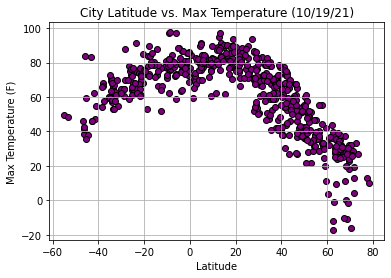

In [29]:
fig, ax = plt.subplots()

ax.scatter(city_data_df['lat'], city_data_df['max_temp'], facecolors = "purple", edgecolor = "black")

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (10/19/21)")
plt.grid(True)



fig.savefig("citylat_temp.png")

#### Latitude vs. Humidity Plot

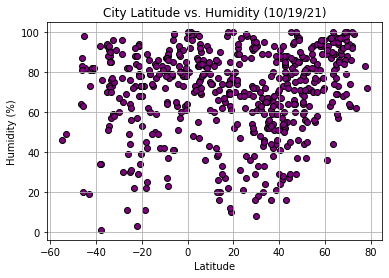

In [30]:
fig, ax = plt.subplots()
ax.scatter(city_data_df['lat'], city_data_df['humidity'], facecolors = "purple", edgecolor = "black")

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (10/19/21)")
plt.grid(True)


fig.savefig("citylat_humidity.png")

#### Latitude vs. Cloudiness Plot

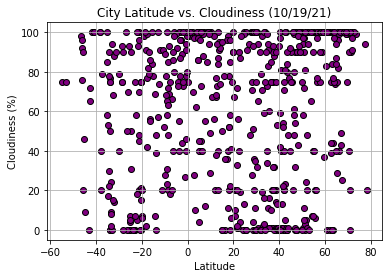

In [31]:
fig, ax = plt.subplots()
ax.scatter(city_data_df['lat'], city_data_df['cloudiness'], facecolors = "purple", edgecolor = "black")

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (10/19/21)")
plt.grid(True)


fig.savefig("citylat_clouds.png")

#### Latitude vs. Wind Speed Plot

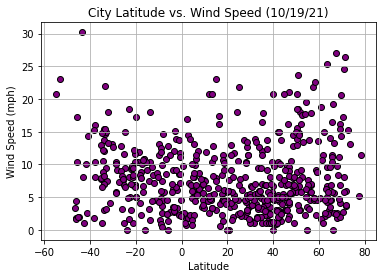

In [32]:
fig, ax = plt.subplots()
ax.scatter(city_data_df['lat'], city_data_df['wind_speed'], facecolors = "purple", edgecolor = "black")

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (10/19/21)")
plt.grid(True)

fig.savefig("citylat_wind.png")

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

Latitude versus humidity

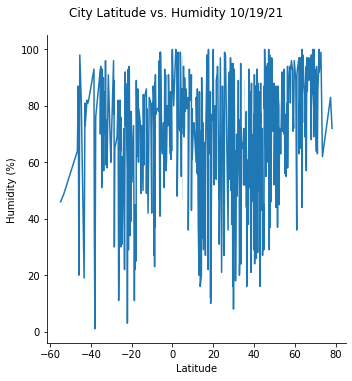

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

g = sns.relplot(x='lat',
           y='humidity', 
           data=city_data_df, 
           kind = "line")
g.fig.suptitle("City Latitude vs. Humidity 10/19/21",
              y=1.05)
g.set(xlabel="Latitude",
     ylabel="Humidity (%)")
plt.show()

Latitude vs Temperature

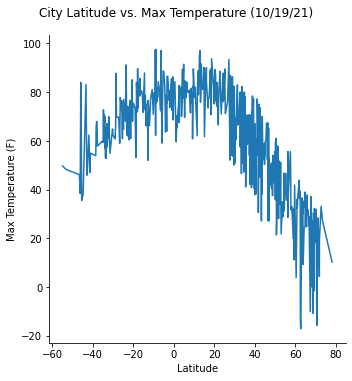

In [34]:
g = sns.relplot(x='lat',
           y='max_temp', 
           data=city_data_df, 
           kind = "line")
g.fig.suptitle("City Latitude vs. Max Temperature (10/19/21)",
              y=1.05)
g.set(xlabel="Latitude",
     ylabel="Max Temperature (F)")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

The temperature increases as it reaches 0 degrees latitude (closer to the equator), and it is warmer in the southern hemisphere.

While there is a wide range in percentage for humidity, for most the cities north of the equator, their humidity levels are around 60%-90%.

Regardless of latitude, the wind speed for most of the cities in the dataset are between 0 - 10 mph.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

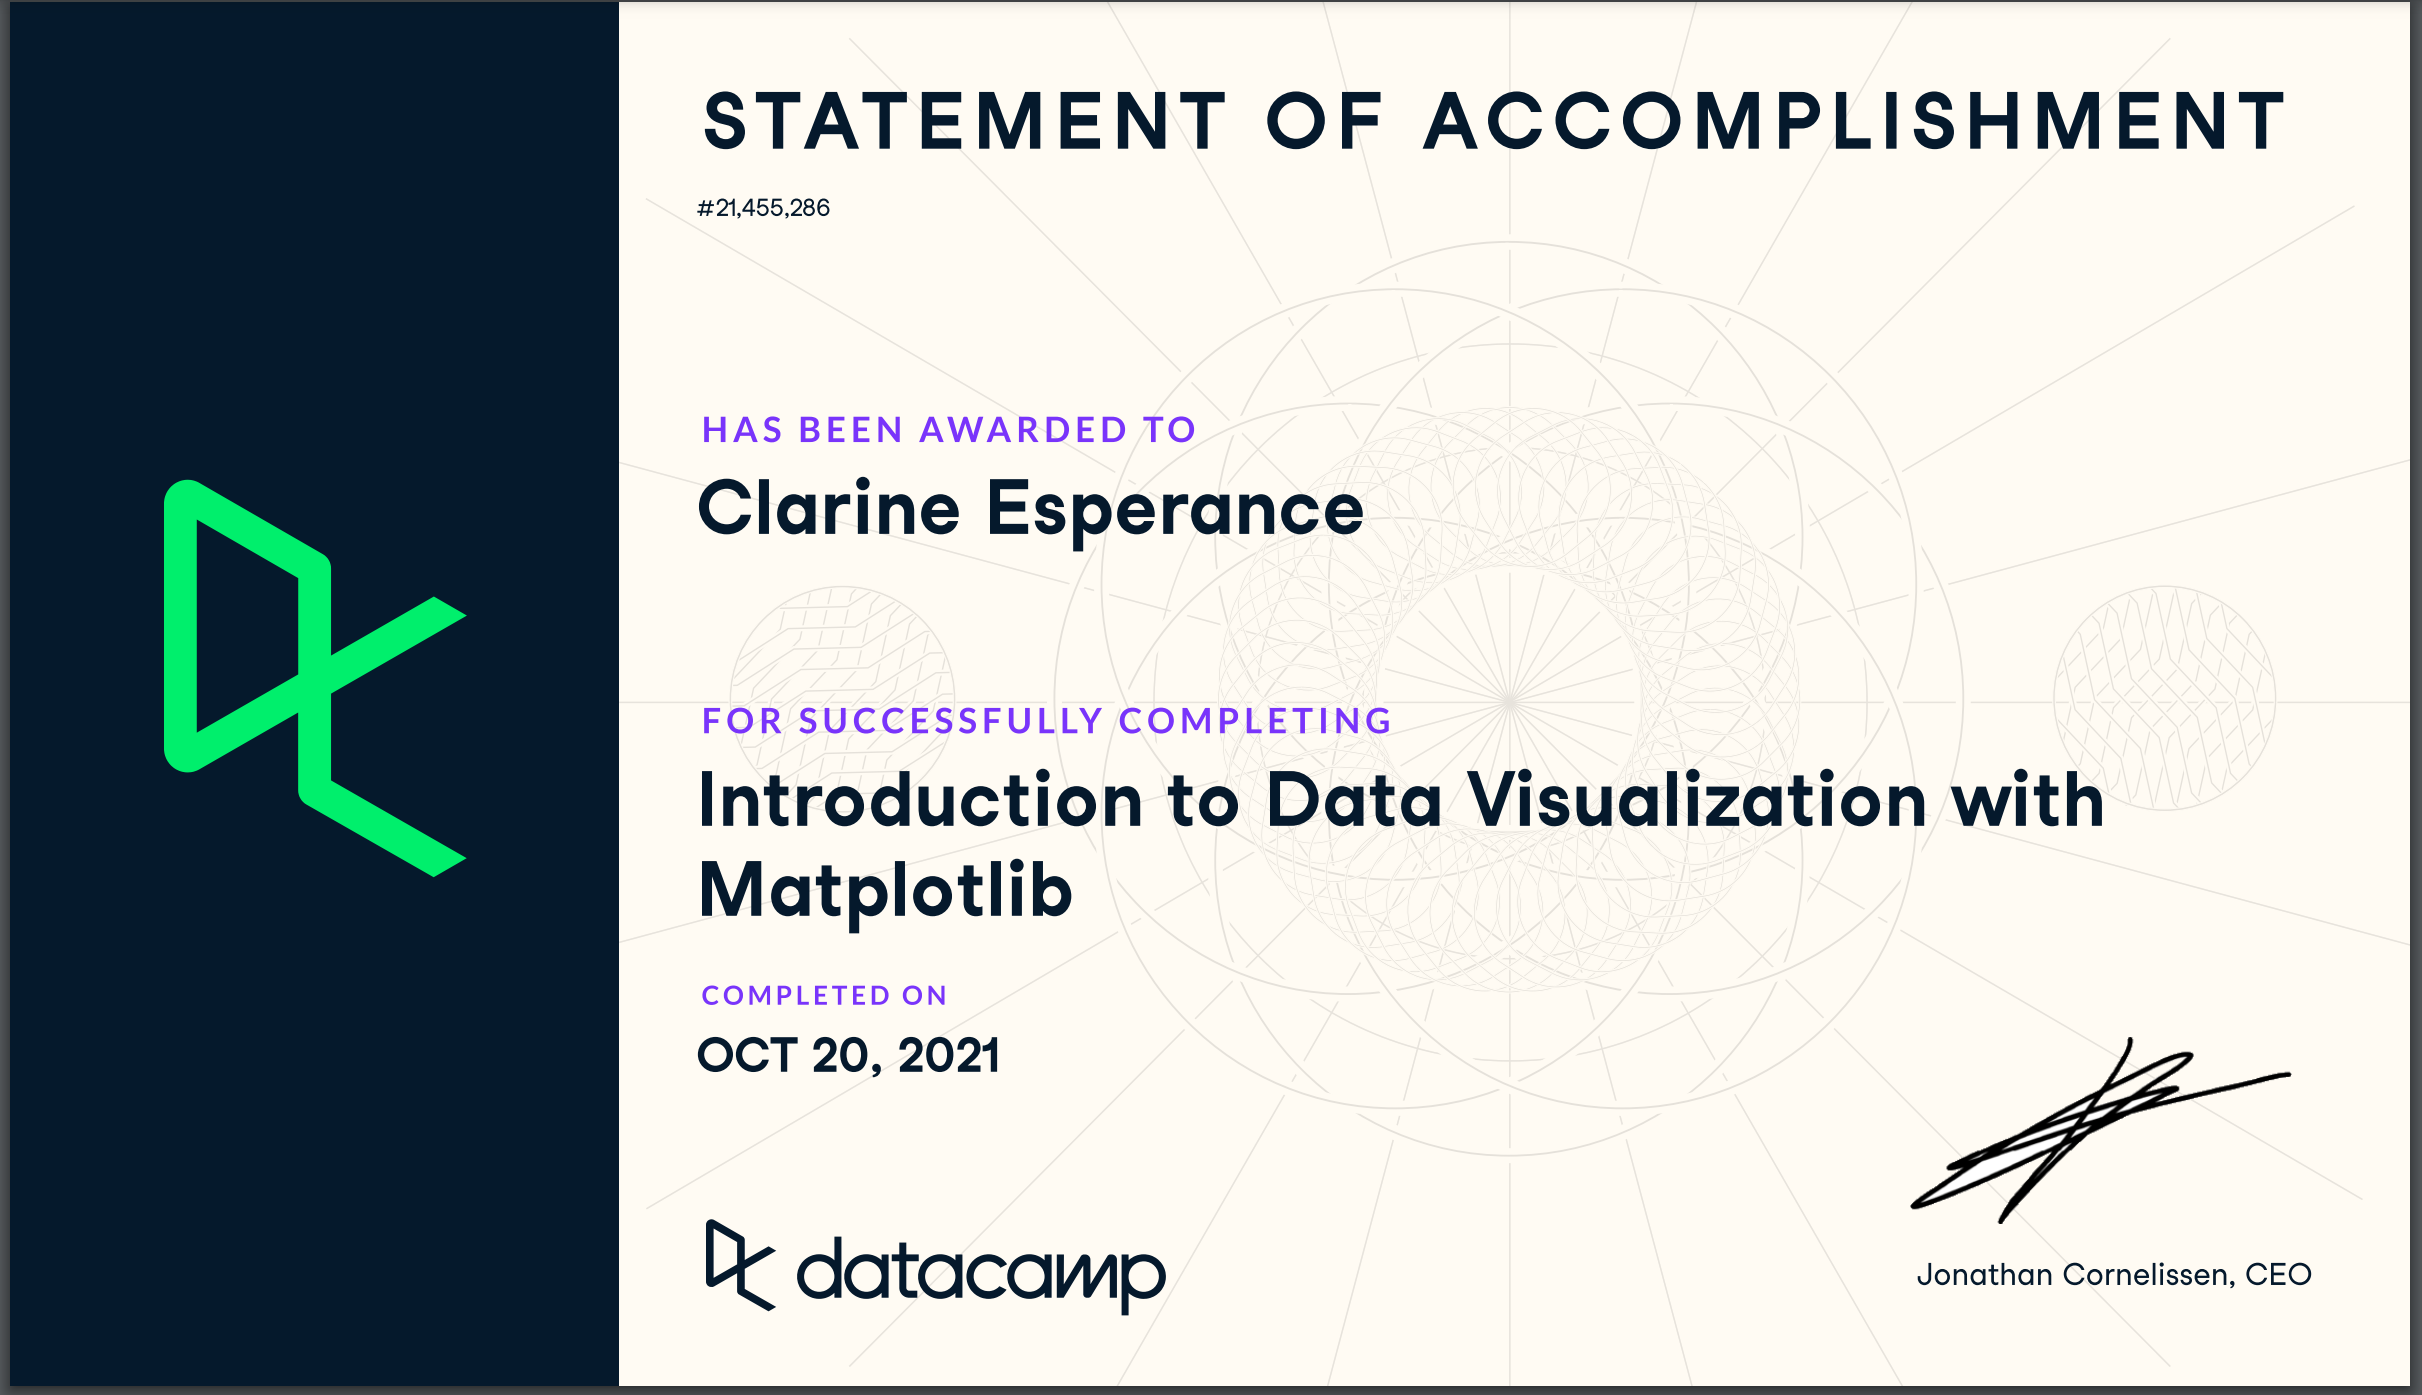

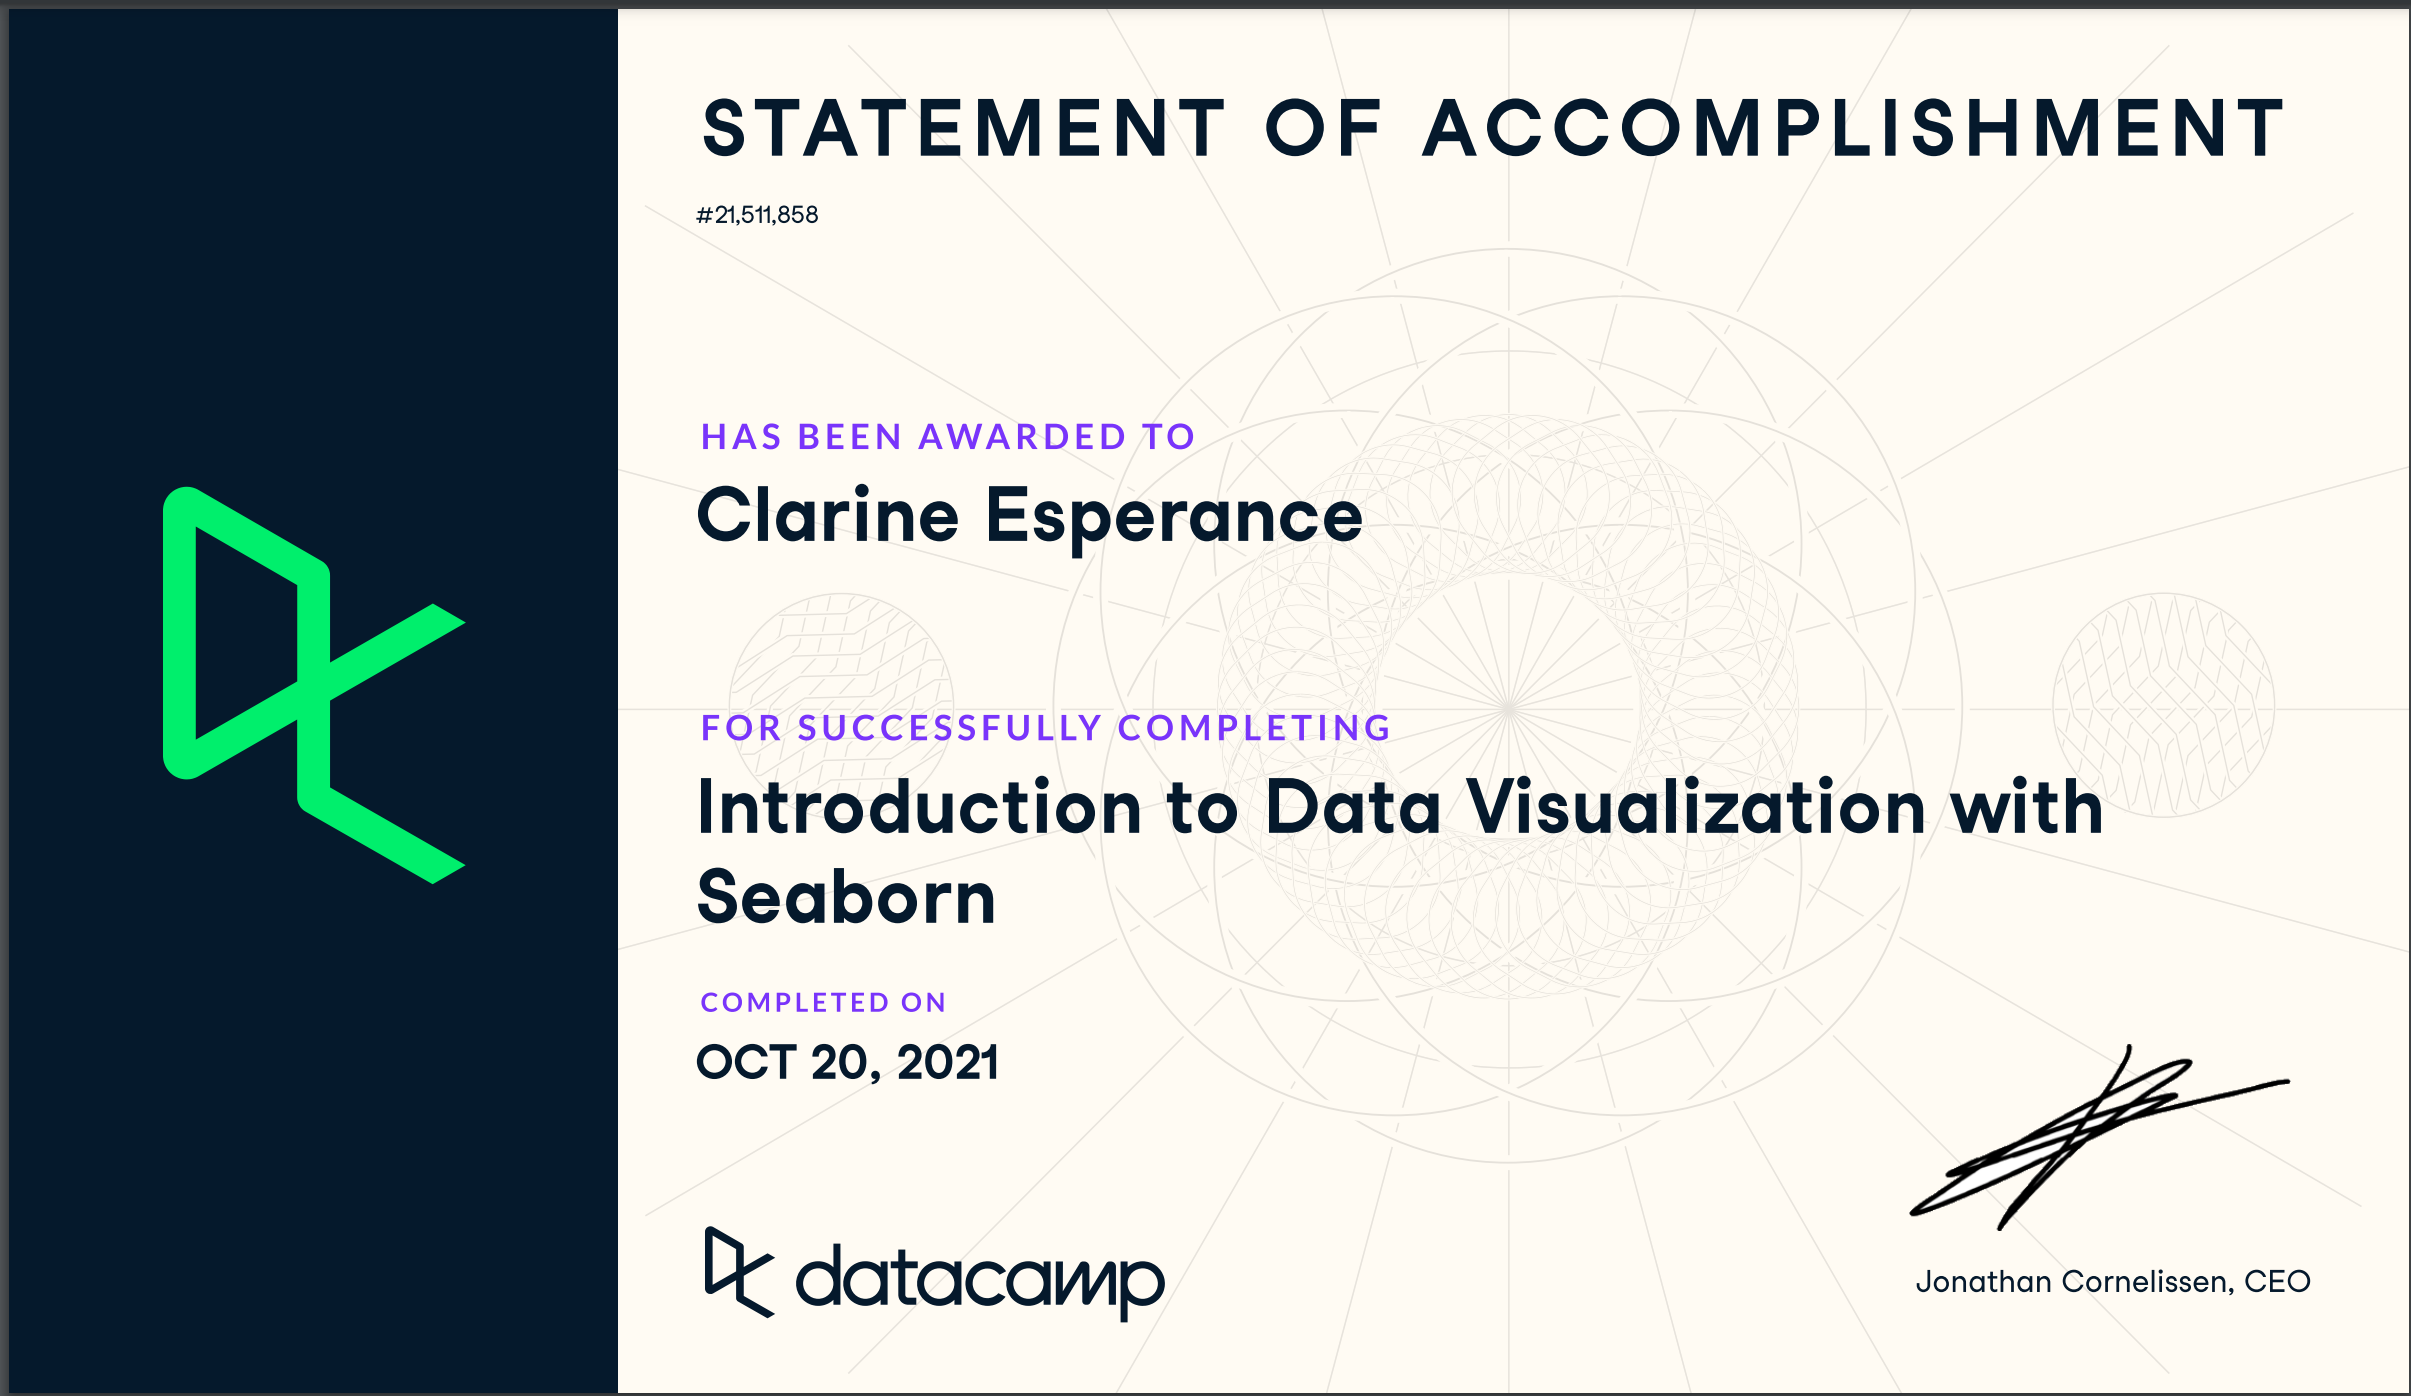